In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [20]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from scipy.stats import randint

In [4]:
# Load the dataset
file_path = ("C:\\Users\\Anna joy\\OneDrive\\Desktop\\domain project\\medical_cost.csv")
data = pd.read_csv(file_path)

In [5]:
print(data.head())

   Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520


In [41]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None

First 5 Rows:
   Id  age     sex     bmi  children smoker     region      charges
0   1   19  female  27.900         0    yes  southwest  16884.92400
1   2   18    male  33.770         1     no  southeast   1725.55230
2   3   28    male  33.000         3     no  southeast   4449.46200
3   4   33    male  22.705         0     no  northwest  21984.47061
4   5   32    male  28.880         0     no  northwest   3866.85520

In [6]:
# Data Exploration
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [43]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Id          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       1.000000    18.000000    15.960000     0.000000   1121.873900
25%     335.250000    27.000000    26.296250     0.000000   4740.287150
50%     669.500000    39.000000    30.400000     1.000000   9382.033000
75%    1003.750000    51.000000    34.693750     2.000000  16639.912515
max    1338.000000    64.000000    53.130000     5.000000  63770.428010


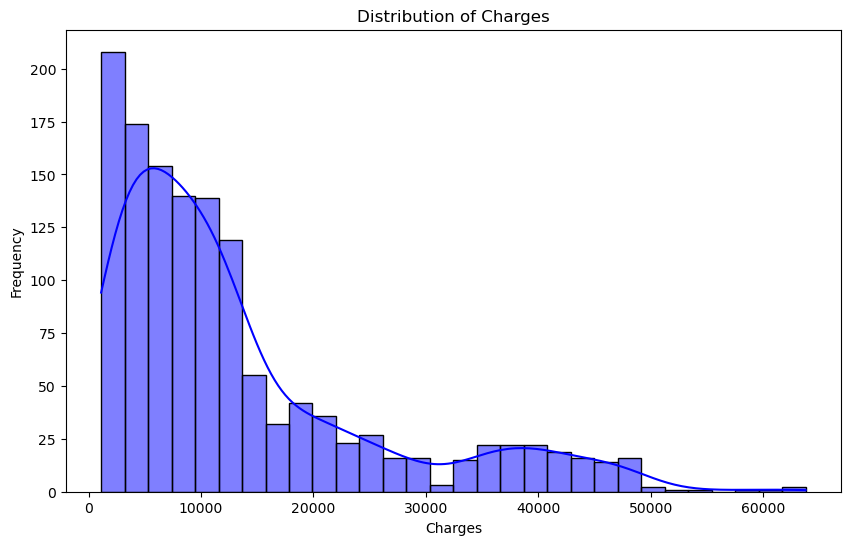

In [7]:
# Preliminary Visualizations
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], color = "blue", kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [13]:

# Encode categorical variables for the correlation matrix
encoded_data = pd.get_dummies(data, drop_first=True)

In [46]:
print(encoded_data)

        Id  age     bmi  children      charges  sex_male  smoker_yes  \
0        1   19  27.900         0  16884.92400     False        True   
1        2   18  33.770         1   1725.55230      True       False   
2        3   28  33.000         3   4449.46200      True       False   
3        4   33  22.705         0  21984.47061      True       False   
4        5   32  28.880         0   3866.85520      True       False   
...    ...  ...     ...       ...          ...       ...         ...   
1333  1334   50  30.970         3  10600.54830      True       False   
1334  1335   18  31.920         0   2205.98080     False       False   
1335  1336   18  36.850         0   1629.83350     False       False   
1336  1337   21  25.800         0   2007.94500     False       False   
1337  1338   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1            

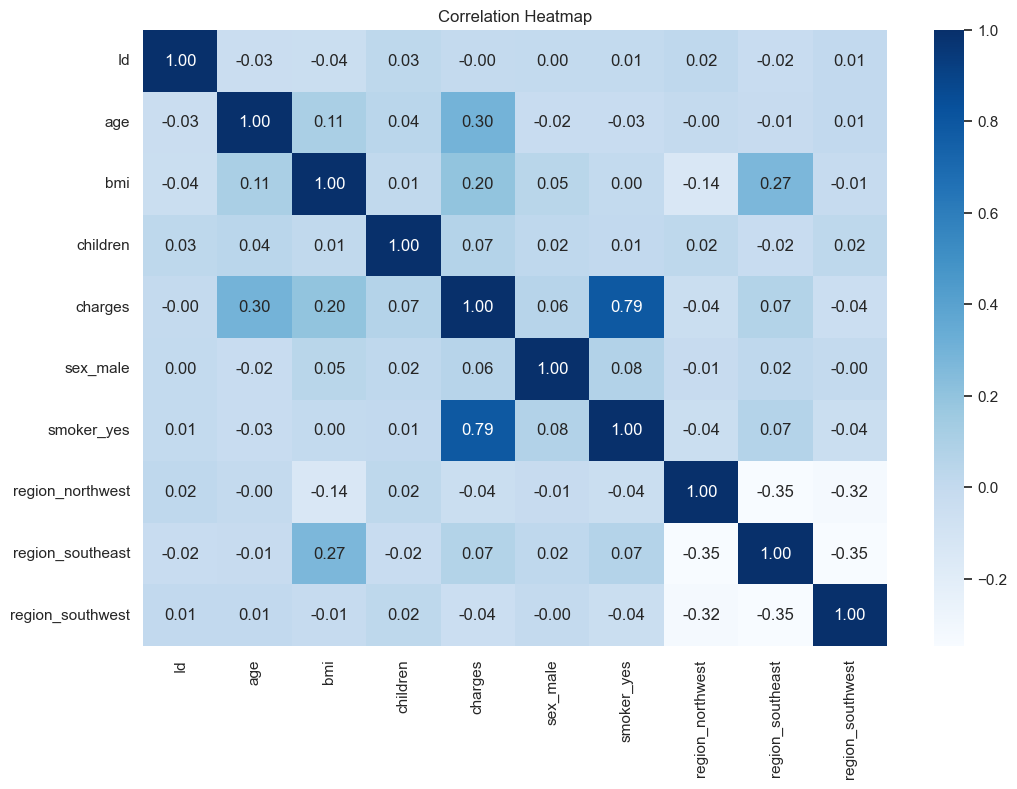

In [47]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
sns.set(style="whitegrid")

In [9]:
num_cols = len(data.columns)

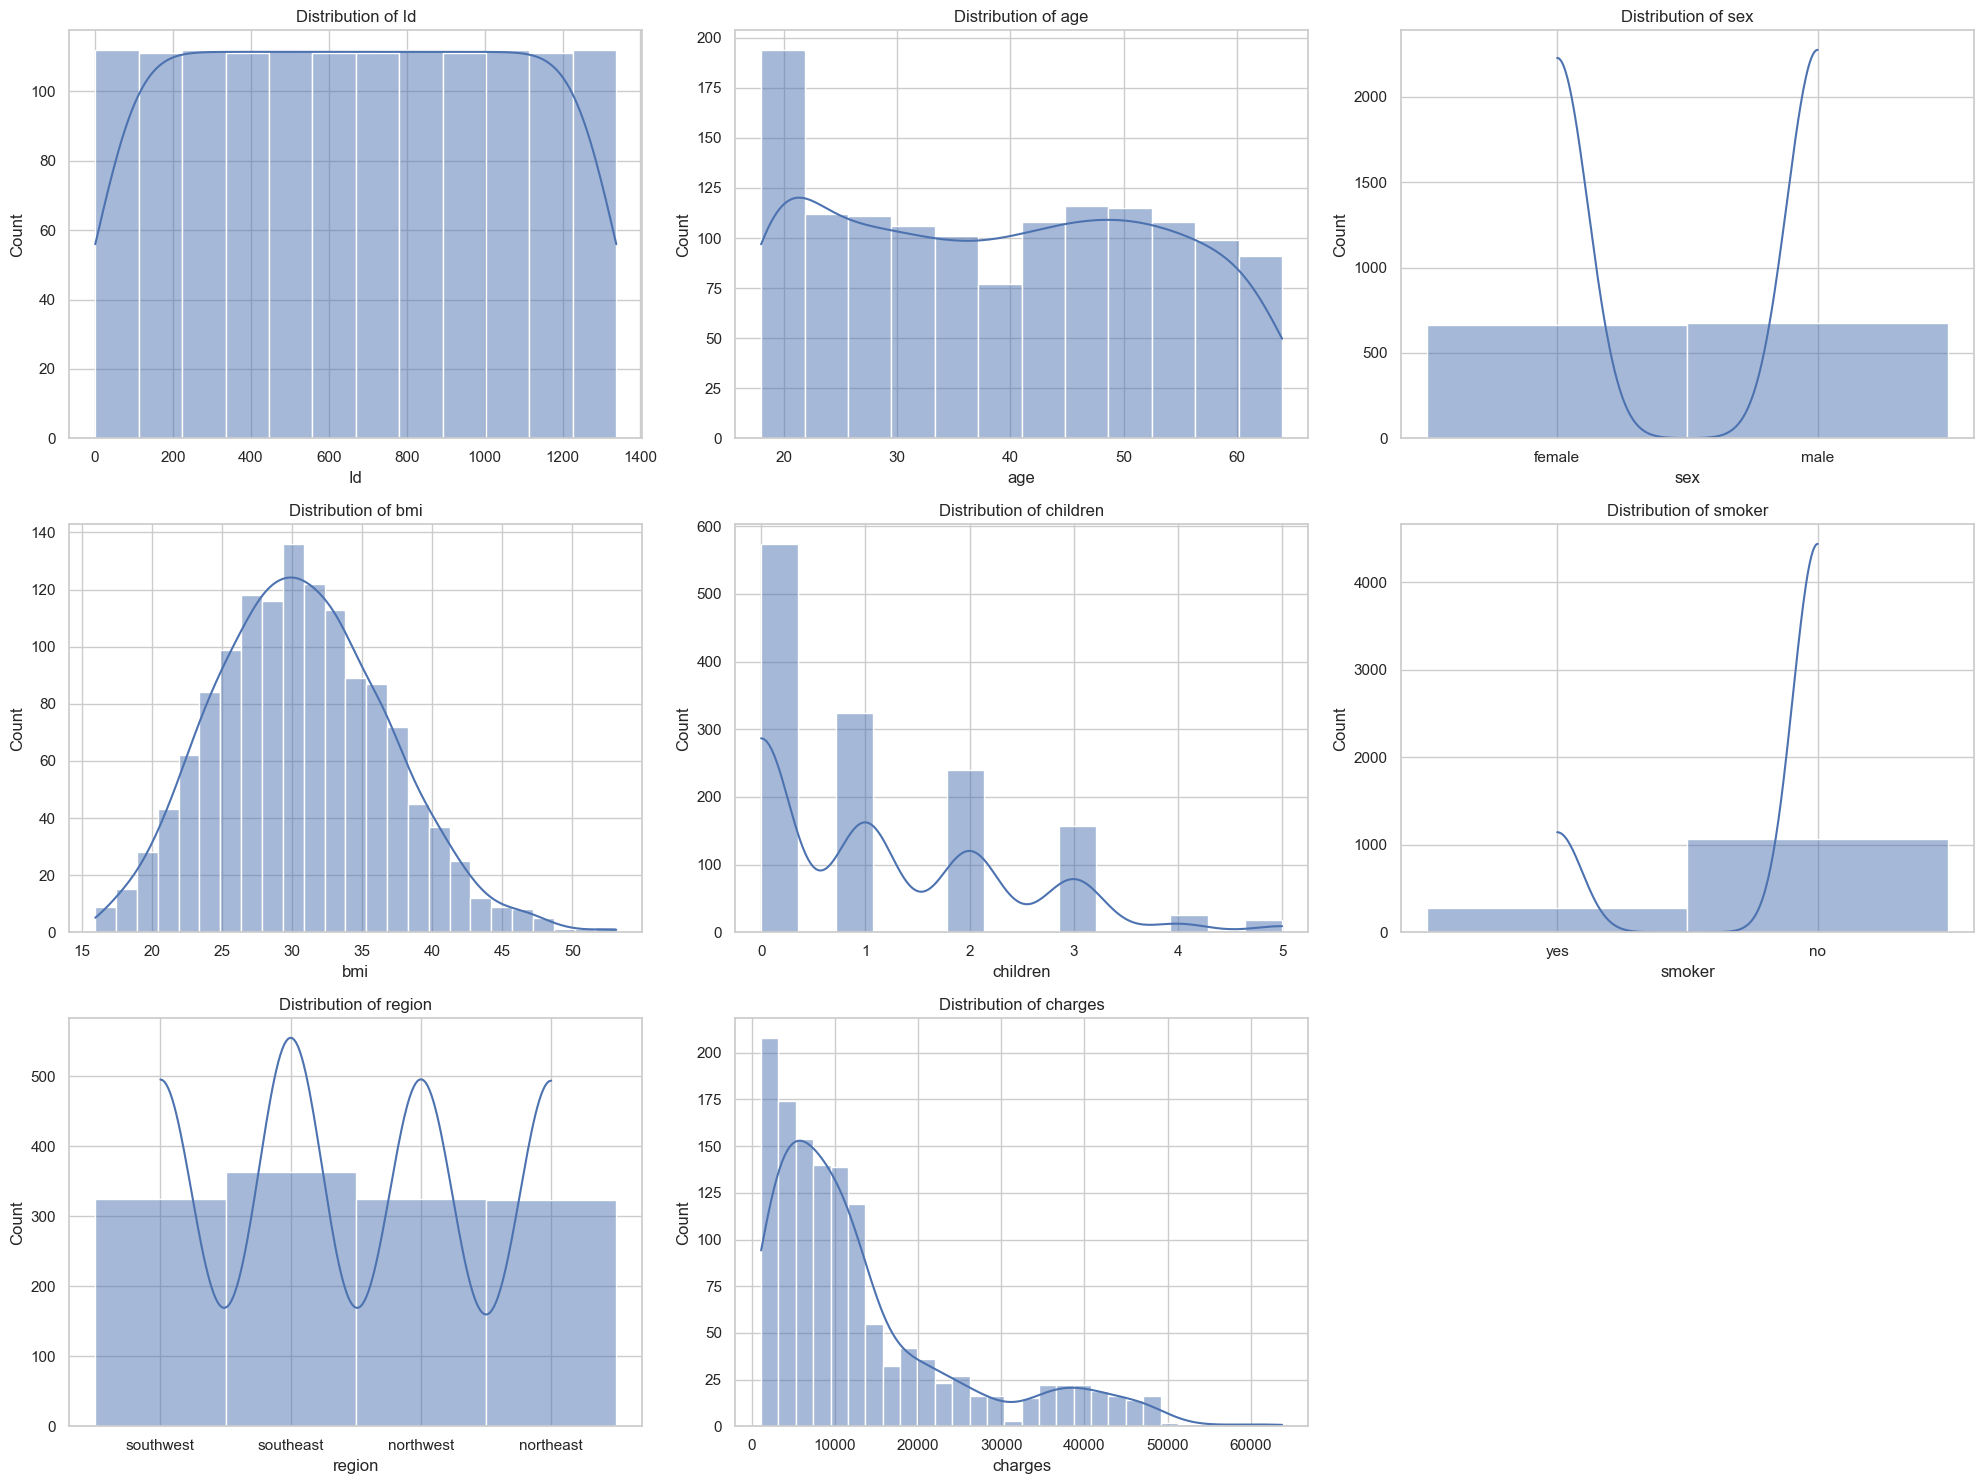

In [50]:


# Calculate the number of rows required
num_rows = (num_cols + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms
for i, column_name in enumerate(data.columns):
    sns.histplot(data[column_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column_name}')

# Remove any unused subplots
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


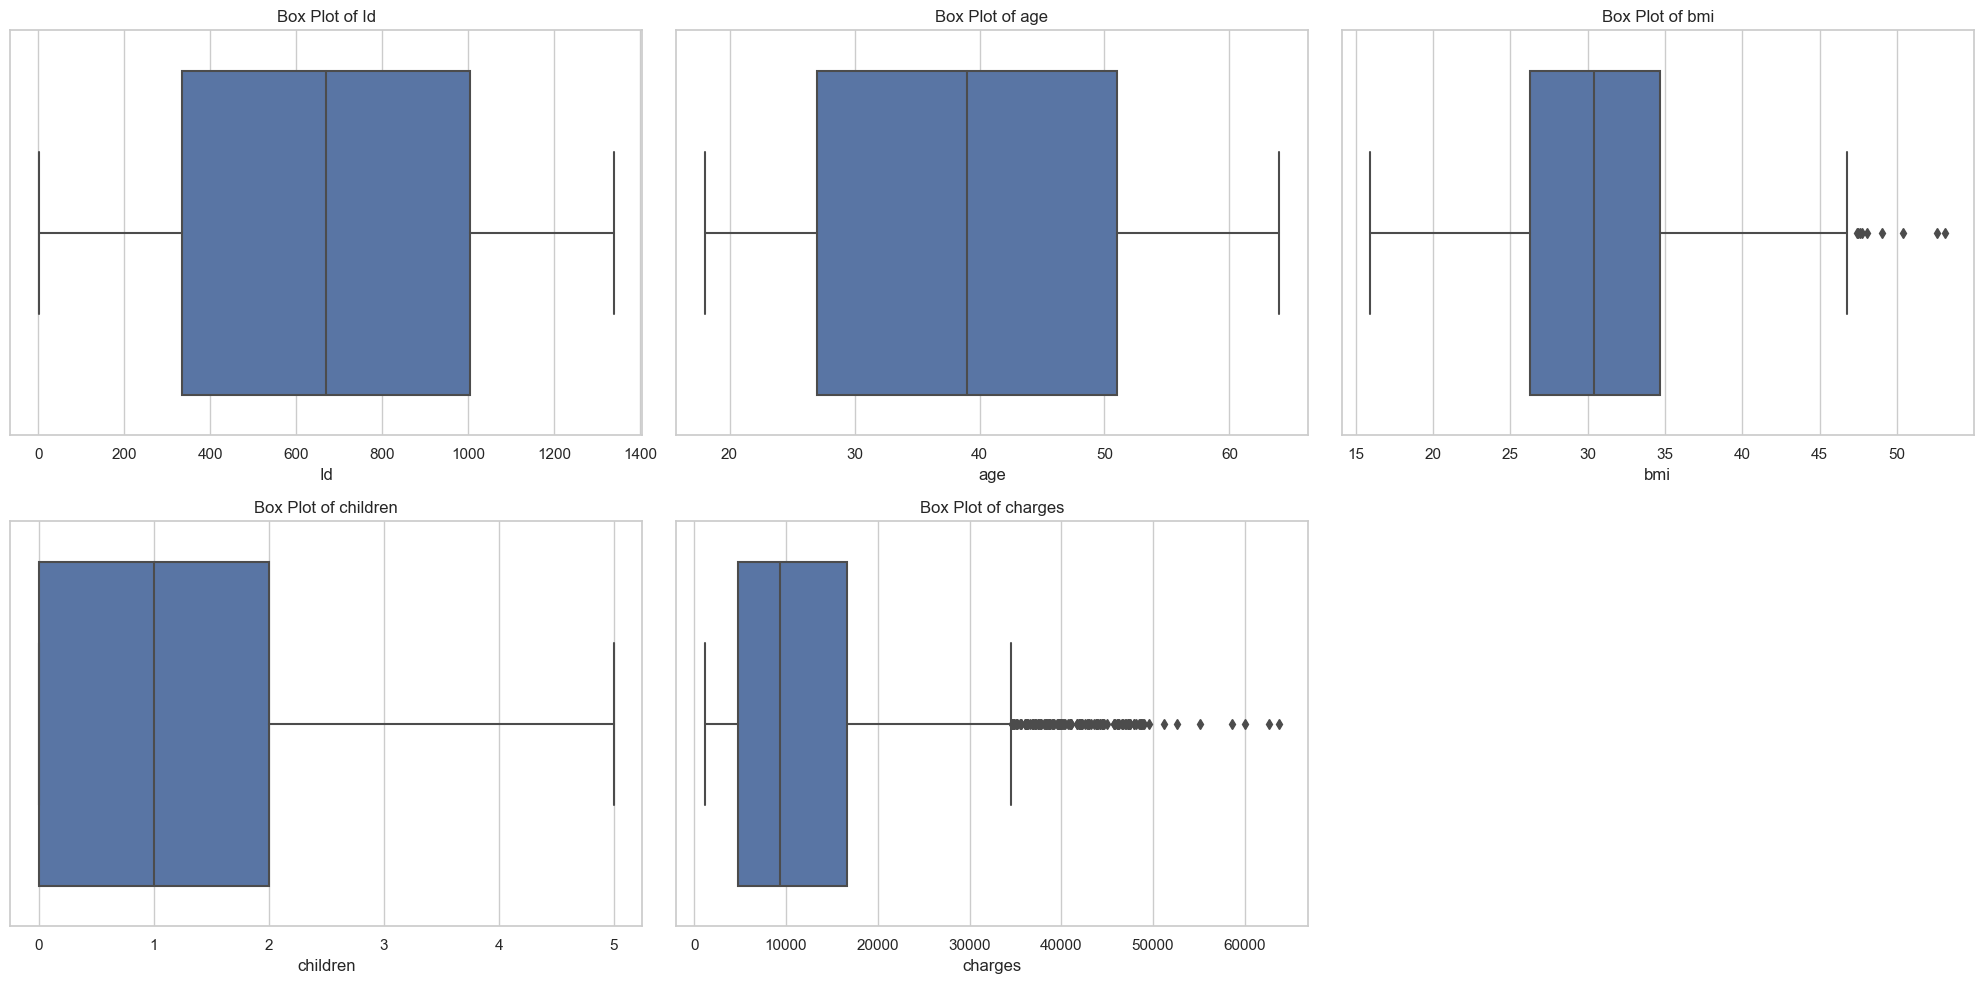

In [51]:
# Assuming 'data' is already defined and loaded
numeric_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# Flatten axes array for easier iteration
axes_flat = axes.flatten() if num_rows > 1 else [axes]

for i, column_name in enumerate(numeric_columns):
    sns.boxplot(x=data[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(f'Box Plot of {column_name}')

# Remove empty subplots
for i in range(len(numeric_columns), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

C:\Users\Anna joy\OneDrive\annu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


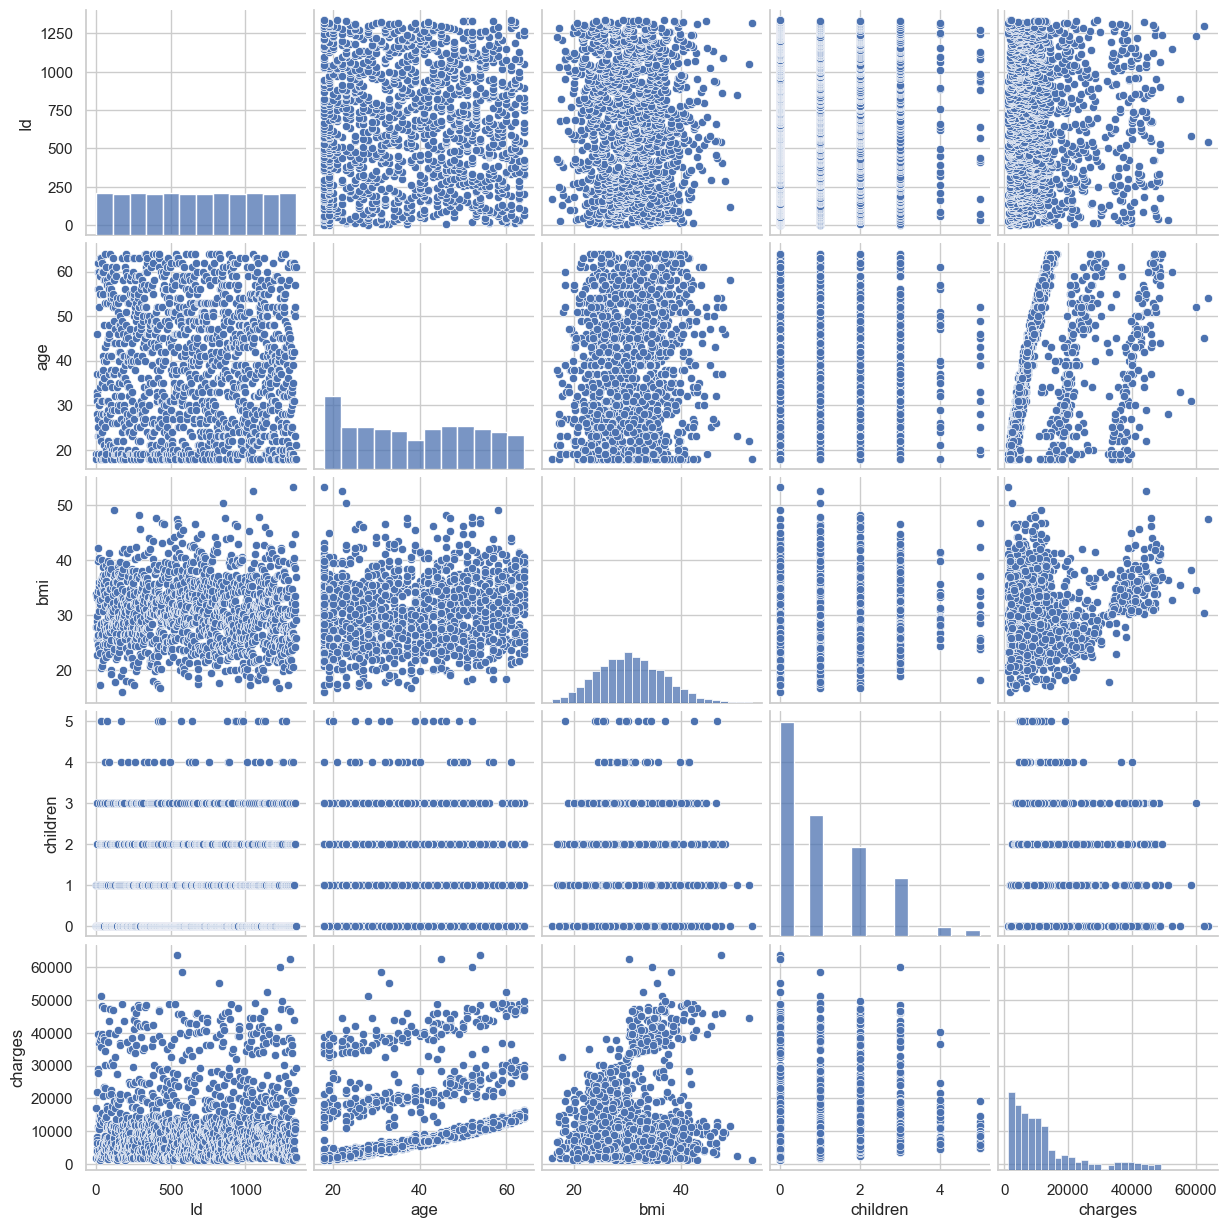

In [11]:
sns.pairplot(data.select_dtypes(include=['number']))
plt.show()

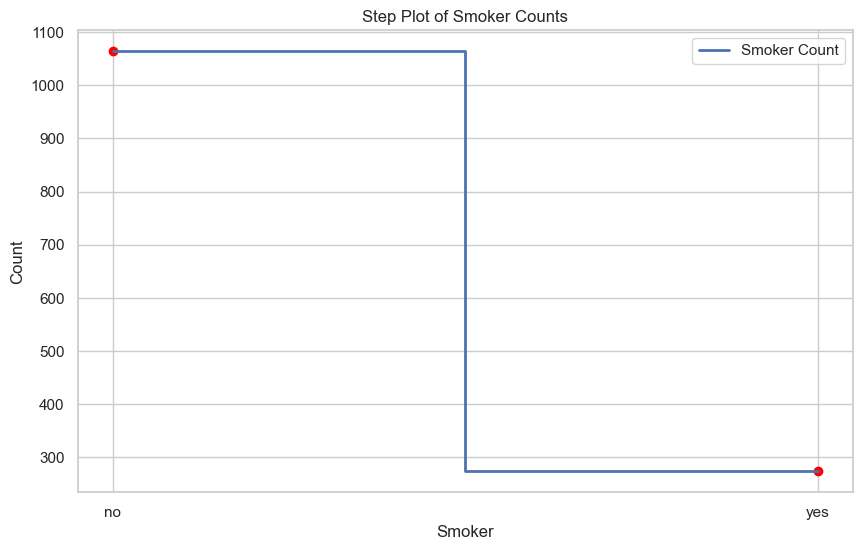

In [53]:

# Count the occurrences of each category in the 'smoker' column
smoker_counts = data['smoker'].value_counts().sort_index()

# Create a step plot
plt.figure(figsize=(10, 6))
plt.step(smoker_counts.index, smoker_counts.values, where='mid', label='Smoker Count', linewidth=2)
plt.scatter(smoker_counts.index, smoker_counts.values, color='red')  # Optional: add markers for clarity

# Add titles and labels
plt.title('Step Plot of Smoker Counts')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [14]:
# Data preparation
X = encoded_data.drop('charges', axis=1)
y = encoded_data['charges']
seed=40

In [22]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = seed)

In [56]:
# Feature scaling for deep neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
print("Multiple Linear Regression - MSE:", mean_squared_error(y_test, y_pred_mlr))
print("Multiple Linear Regression - R2 Score:", r2_score(y_test, y_pred_mlr))

Multiple Linear Regression - MSE: 38945803.423546486
Multiple Linear Regression - R2 Score: 0.7250594207740115


In [27]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regressor - R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Regressor - MSE: 41397641.57285626
Decision Tree Regressor - R2 Score: 0.7077505006418865


In [59]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor - R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regressor - MSE: 21538911.77501183
Random Forest Regressor - R2 Score: 0.8612619145544956


In [60]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("Gradient Boosting Regressor - MSE:", mean_squared_error(y_test, y_pred_gbr))
print("Gradient Boosting Regressor - R2 Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting Regressor - MSE: 19165143.501997586
Gradient Boosting Regressor - R2 Score: 0.8765520122590301


In [61]:
# Deep Neural Network
dnn = Sequential()
dnn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(1, activation='linear'))
dnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dnn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred_dnn = dnn.predict(X_test_scaled)
print("Deep Neural Network - MSE:", mean_squared_error(y_test, y_pred_dnn))
print("Deep Neural Network - R2 Score:", r2_score(y_test, y_pred_dnn))

C:\Users\albin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Deep Neural Network - MSE: 32836285.505598966
Deep Neural Network - R2 Score: 0.7884924070549398
